In [1]:
import pandas as pd
import numpy as np

import scipy
# from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [2]:
# read CSV
df=pd.read_csv("unified_csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 4050 non-null   object 
 1   status                                       4050 non-null   object 
 2   category_group_list                          4050 non-null   object 
 3   num_funding_rounds                           4050 non-null   float64
 4   total_funding_usd                            4050 non-null   float64
 5   founded_on                                   4050 non-null   float64
 6   employee_count                               4050 non-null   object 
 7   cat_commerce_shopping                        4050 non-null   float64
 8   cat_fin_services                             4050 non-null   float64
 9   cat_lending_invests                          4050 non-null   float64
 10  

In [3]:
list(df)

['company_name',
 'status',
 'category_group_list',
 'num_funding_rounds',
 'total_funding_usd',
 'founded_on',
 'employee_count',
 'cat_commerce_shopping',
 'cat_fin_services',
 'cat_lending_invests',
 'cat_payments',
 'fd_rd_latest_investment',
 'fd_rd_investment_type_series_unknown',
 'fd_rd_investment_type_grant',
 'fd_rd_investment_type_debt_financing',
 'fd_rd_investment_type_pre_seed',
 'fd_rd_investment_type_post_ipo_equity',
 'fd_rd_investment_type_convertible_note',
 'fd_rd_investment_type_equity_crowdfunding',
 'fd_rd_investment_type_private_equity',
 'fd_rd_investment_type_undisclosed',
 'fd_rd_investment_type_post_ipo_debt',
 'fd_rd_investment_type_corporate_round',
 'fd_rd_investment_type_product_crowdfunding',
 'fd_rd_investment_type_non_equity_assistance',
 'fd_rd_investment_type_initial_coin_offering',
 'fd_rd_investment_type_secondary_market',
 'fd_rd_investment_type_post_ipo_secondary',
 'fd_rd_num_invested_by_top_100',
 'event_count',
 'job_duration',
 'gender_male'

In [4]:
keep_col = [
    # 'company_name',
    # 'status',
    # 'category_group_list',
    'num_funding_rounds',
    'total_funding_usd',
    'founded_on',
    'employee_count',
    'cat_commerce_shopping',
    'cat_fin_services',
    'cat_lending_invests',
    'cat_payments',
    'fd_rd_latest_investment',
    # 'fd_rd_investment_type_series_unknown',
    # 'fd_rd_investment_type_grant',
    # 'fd_rd_investment_type_debt_financing',
    # 'fd_rd_investment_type_pre_seed',
    # 'fd_rd_investment_type_post_ipo_equity',
    # 'fd_rd_investment_type_convertible_note',
    # 'fd_rd_investment_type_equity_crowdfunding',
    # 'fd_rd_investment_type_private_equity',
    # 'fd_rd_investment_type_undisclosed',
    # 'fd_rd_investment_type_post_ipo_debt',
    # 'fd_rd_investment_type_corporate_round',
    # 'fd_rd_investment_type_product_crowdfunding',
    # 'fd_rd_investment_type_non_equity_assistance',
    # 'fd_rd_investment_type_initial_coin_offering',
    # 'fd_rd_investment_type_secondary_market',
    # 'fd_rd_investment_type_post_ipo_secondary',
    'fd_rd_num_invested_by_top_100',
    'event_count',
    # 'job_duration',
    # 'gender_male',
    # 'gender_female',
    'degree_type',
    # 'subject_Business',
    # 'subject_STEM',
    # 'subject_Arts_SoSc',
    'num_exec',
    'first_fund_raised',
    'first_fund_post_money',
    'first_fund_investor_count',
    'has_parent',
    'continent_NA',
    'continent_EU',
    'continent_AS',
    'continent_SA',
    # 'continent_AF',
    # 'continent_OC',
    'country_code_USA',
    'country_code_GBR',
    'country_code_IND',
    'country_code_CHN',
    # 'country_code_CAN',
    # 'country_code_SGP',
    # 'country_code_AUS',
    # 'country_code_DEU',
    # 'country_code_BRA',
    # 'country_code_CHE',
    # 'country_code_ESP',
    # 'country_code_FRA',
    # 'country_code_NLD',
    # 'country_code_HKG',
    # 'country_code_ISR',
    # 'country_code_KOR',
    # 'country_code_SWE',
    # 'country_code_JPN',
    # 'country_code_MEX',
    # 'country_code_IDN',
    'city_London',
    'city_New York',
    'city_San Francisco',
    'city_Singapore',
    'city_Toronto',
    'city_Beijing',
    # 'city_Mumbai',
    # 'city_Los Angeles',
    # 'city_Chicago',
    # 'city_Sydney',
    # 'city_Paris',
    # 'city_São Paulo',
    # 'city_Tokyo',
    # 'city_Berlin',
    # 'city_Boston',
    # 'city_Stockholm',
    # 'city_Shanghai',
    # 'city_Tel Aviv',
    # 'city_Amsterdam',
    # 'city_Madrid',
    'status_operating',
    'status_exited',
    'status_closed',
    'has_acquisitions',
    'has_ipo',
    'average_change_in_funds',
    'average_momentum',
    'latest_momentum'
]

df = df[keep_col]

In [5]:
df.drop(columns='employee_count', inplace=True)
df.insert(df.columns.get_loc('first_fund_raised'),column='first_fund_raised_log',value=np.log(df['first_fund_raised']))
df.drop(columns=['first_fund_raised'], inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

In [6]:
df.head()

,num_funding_rounds,total_funding_usd,founded_on,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_num_invested_by_top_100,event_count,degree_type,num_exec,first_fund_raised_log,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,status_operating,status_exited,status_closed,has_acquisitions,has_ipo,average_change_in_funds,average_momentum,latest_momentum
0,3.0,4025000.0,4.0767,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,15.068274,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.478261,2.964229,2.964229
1,5.0,13316538.0,8.7507,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.333333,6.0,14.421009,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.557546,0.934681,0.331667
2,5.0,57011648.0,6.0795,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.727273,11.0,0.000000,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.579845,0.825104,1.801594
3,10.0,3180350.0,4.7068,0.0,1.0,0.0,0.0,2.0,1.0,3.0,0.526316,19.0,13.981322,0.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.515446,0.228600,0.228600
4,4.0,5700000.0,10.4164,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.000000,6.0,14.557448,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.908425,0.341418,0.298739


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   num_funding_rounds             4050 non-null   float64
 1   total_funding_usd              4050 non-null   float64
 2   founded_on                     4050 non-null   float64
 3   cat_commerce_shopping          4050 non-null   float64
 4   cat_fin_services               4050 non-null   float64
 5   cat_lending_invests            4050 non-null   float64
 6   cat_payments                   4050 non-null   float64
 7   fd_rd_latest_investment        4050 non-null   float64
 8   fd_rd_num_invested_by_top_100  4050 non-null   float64
 9   event_count                    4050 non-null   float64
 10  degree_type                    4050 non-null   float64
 11  num_exec                       4050 non-null   float64
 12  first_fund_raised_log          4050 non-null   f

In [8]:
X = df.iloc[:, :-8]
y = df.iloc[:, -2]

In [9]:
X_minmax = MinMaxScaler().fit_transform(X)

# ylabel= y.drop(columns=["has_acquisitions"])

binary_labels = [0,1]

# ylabel["average_change_in_funds"]= pd.qcut(ylabel["average_change_in_funds"], 2, labels = binary_labels)
# ylabel["average_momentum"]= pd.qcut(ylabel["average_momentum"], 2, labels = binary_labels)
# ylabel["latest_momentum"]= pd.qcut(ylabel["latest_momentum"], 2, labels = binary_labels)
# y = pd.qcut(y, 2, labels=binary_labels)
y = pd.qcut(y, 5, labels=[0,1,2,3,4])

In [10]:
# corrmat = df.corr()
# plt.figure(figsize = (50, 50))
# sns.heatmap(df[corrmat.index].corr(), annot=True, fmt='.2f', cmap='coolwarm')
# # sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
# plt.plot()

In [11]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                            Specs         Score
1               total_funding_usd  2.292100e+10
13          first_fund_post_money  6.135332e+08
11                       num_exec  7.390623e+02
14      first_fund_investor_count  6.630053e+02
12          first_fund_raised_log  3.769481e+02
2                      founded_on  2.165003e+02
7         fd_rd_latest_investment  2.028554e+02
9                     event_count  1.272824e+02
0              num_funding_rounds  7.423144e+01
8   fd_rd_num_invested_by_top_100  7.332694e+01


[0.07333817 0.10885002 0.11097221 0.02272896 0.00767929 0.02920295
 0.03027672 0.05264575 0.02555123 0.05319586 0.07987521 0.091473
 0.09002854 0.02815933 0.07704422 0.00531317 0.01177482 0.01315995
 0.01088464 0.00591566 0.01285527 0.00786073 0.00673809 0.00383729
 0.00710063 0.0124243  0.00899394 0.00528659 0.00367748 0.00315597]


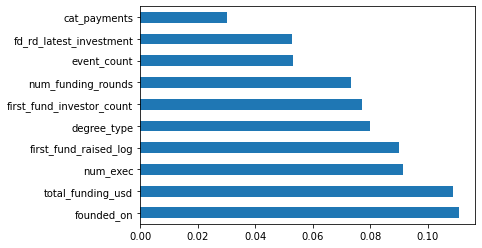

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_minmax,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

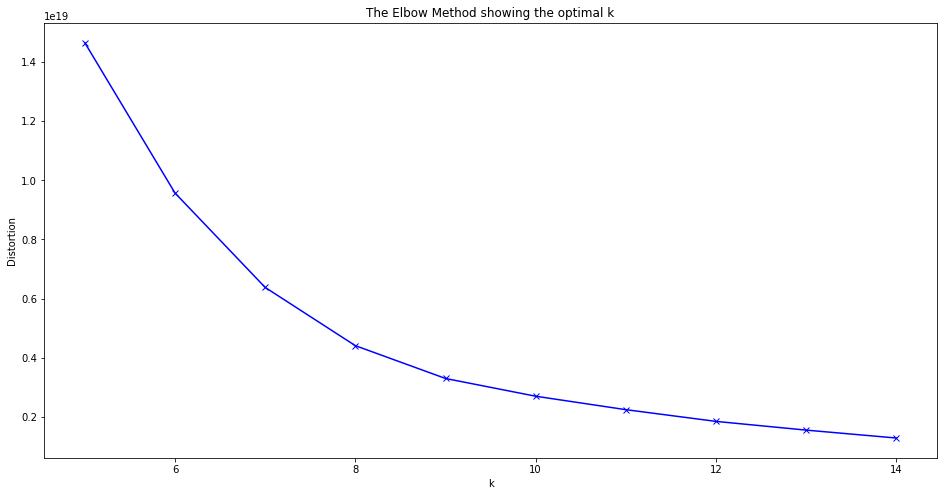

In [13]:
# elbow plot
distortions = []
# K = range(1, 10)
K = range(5, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

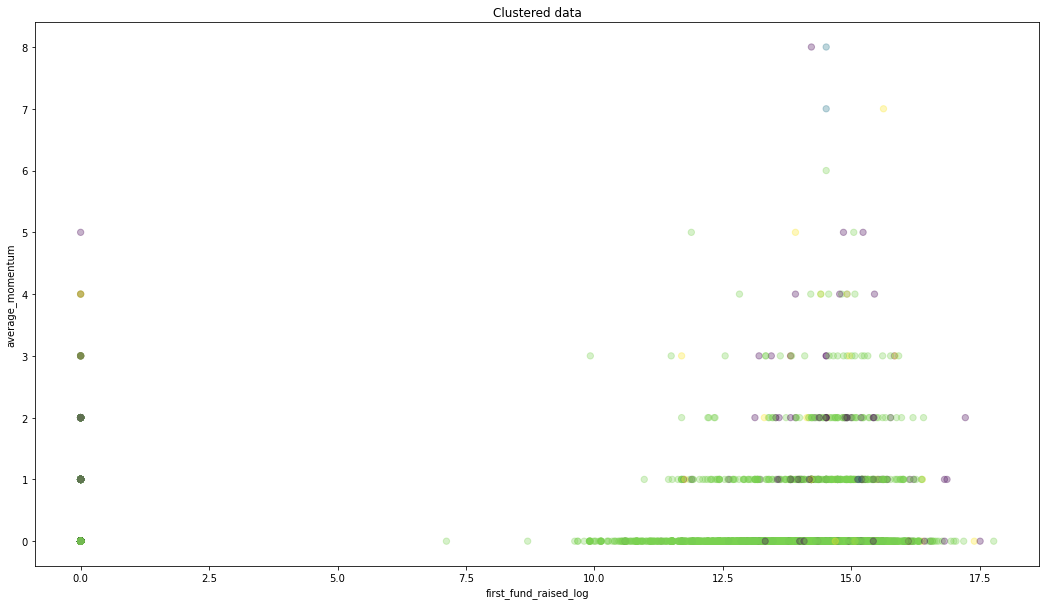

In [14]:
kmeans = KMeans(n_clusters=6).fit(X.astype(float))
centroids = kmeans.cluster_centers_
# centroids

plt.figure(figsize=(18,10))
plt.scatter(X['first_fund_raised_log'], X['fd_rd_num_invested_by_top_100'], c = kmeans.labels_.astype(float), s = 40, alpha = 0.3)
# plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s = 30)
plt.title("Clustered data")
plt.xlabel("first_fund_raised_log")
plt.ylabel("average_momentum")
plt.show()
# This isn't a useful graph. Just put it here for later use

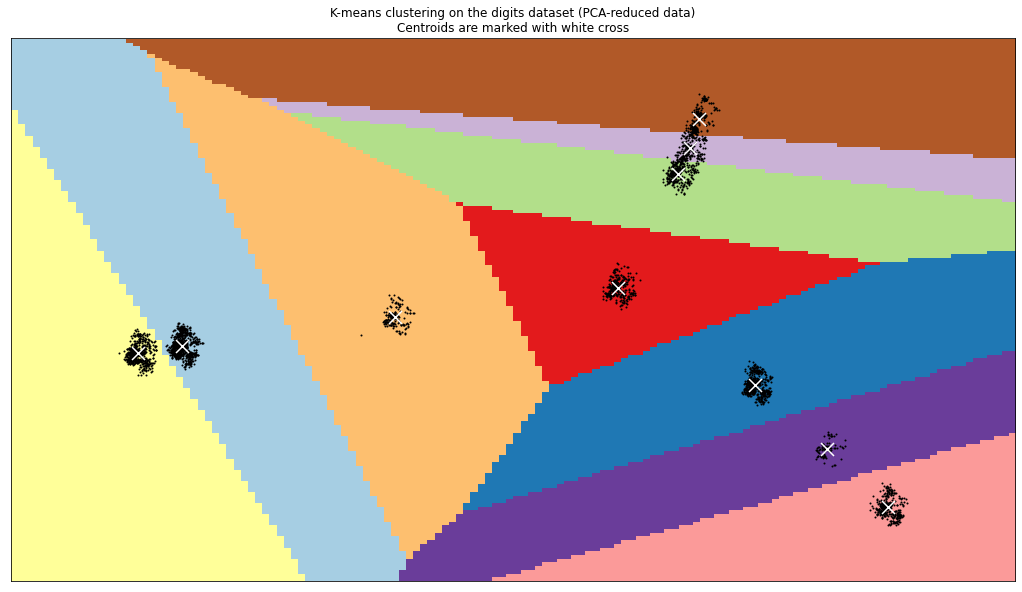

In [15]:
data = X_minmax
plt.figure(figsize=(18,10))

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.3, reduced_data[:, 0].max() + 0.3
y_min, y_max = reduced_data[:, 1].min() - 0.3, reduced_data[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()